Populating the interactive namespace from numpy and matplotlib



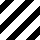
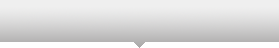
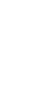
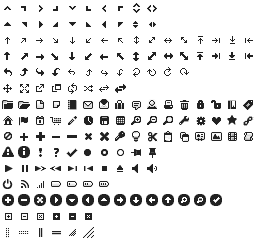
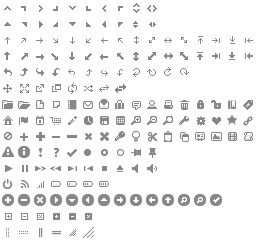
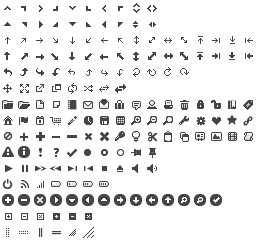
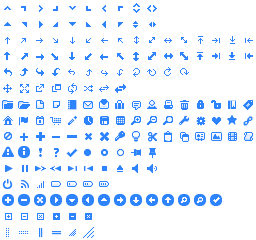
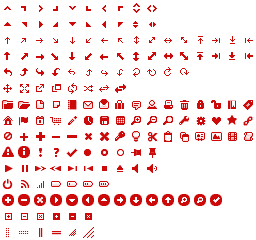
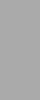
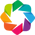
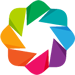
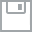
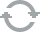
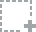
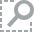
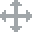
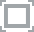
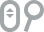

In [1]:
%matplotlib inline
%pylab inline
# data manipulation and modeling
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas.stats.moments import ewma, ewmcorr
from sklearn import datasets, linear_model
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split, KFold

# graphix
import matplotlib.pyplot as plt
import prettyplotlib as pplt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsaplots

from bokeh.plotting import figure,gridplot,show,output_notebook
from bokeh.models import Range1d
output_notebook()

# utility
import os

# notebook parameters
pd.set_option('display.max_columns', 40) # number of columns in training set
plt.rcParams['figure.figsize'] = (25.0, 25.0)

In [2]:
training_data = pd.read_csv("TrainingSet.csv", index_col=0)
submission_labels = pd.read_csv("SubmissionRows.csv", index_col=0)

In [3]:
#training_data.head(100)

In [4]:
#submission_labels.head()

Submission labels are simpler. First observation is we want to predict 2008 and 2012 (and not the years in between). Second observation is that the index values indentify specific rows in the training set. E.g., we want to predict the row in the training set that has the ID 559. Just to look that up:

In [5]:
#training_data.loc[559]

make it easier to grab any column that we want.

In [6]:
def generate_year_list(start, stop=None):
    """ 
    make a list of column names for specific years
    in the format they appear in the data frame start/stop inclusive
    """

    if isinstance(start, list):
        data_range = start
    elif stop:
        data_range = range(start, stop+1)
    else:
        data_range = [start]
    
    yrs = []
    
    for yr in data_range:
        yrs.append("{0} [YR{0}]".format(yr))
        
    return yrs

# ========== TEST CASES =======
# one year
print generate_year_list(2008)

# start and stop (inclusive)
print generate_year_list(1985, 1990)

# custom year list
print generate_year_list([1985, 1990])

['2008 [YR2008]']
['1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]', '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]']
['1985 [YR1985]', '1990 [YR1990]']


In [7]:
prediction_rows = training_data.loc[submission_labels.index]

In [8]:
#prediction_rows

In [9]:
prediction_rows = prediction_rows[generate_year_list(1972, 2007)]
#prediction_rows

In [10]:
#prediction_rows.info()

In [11]:
# p1 = figure(title='Title',plot_width=800, plot_height=800)
# p1.line(generate_year_list(2000, 2007),training_data.loc[737],alpha=.4, line_width=4)
# show(p1)
#country, descrip = training_data[["Country Name", "Series Name"]].loc[r]

#p2 = figure(title="{} - {}".format(country, descrip),plot_width=500, plot_height=200,title_text_font_size='6pt')
#p2 = figure(title="Try",plot_width=500, plot_height=200,title_text_font_size='6pt')
#p2.line(generate_year_list(1972, 2007),training_data[100:101,:],alpha=.4, line_width=2)
#p2.scatter(generate_year_list(2000, 2007),training_data.loc[737], alpha=0.4,)
#show(p2)

In [12]:
np.random.seed(10)
rand_rows = np.random.choice(prediction_rows.index.values, size=10)

def plot_rows(data, ids=None):
#     bmap = pplt.brewer2mpl.get_map('Set3','Qualitative', 10)
#     colors = bmap.mpl_colors
    
    if not None == ids:
        get_rows = lambda: enumerate(ids)
    else:
        get_rows = lambda: enumerate(data.index.values)
    
    for i,r in get_rows():
        time_data = data.loc[r]

        just_years = [y[:4] for y in data.columns]
        X = pd.DatetimeIndex(just_years)
        country, descrip = training_data[["Country Name", "Series Name"]].loc[r]

        p = figure(title="{} - {}".format(country, descrip),plot_width=500, plot_height=200,title_text_font_size='6pt')
        p.line(X, time_data,alpha=.4, line_width=2)
        p.scatter(X, time_data, alpha=0.4,)
        show(p)
plot_rows(prediction_rows, ids=rand_rows)


P:\Anaconda Python\Anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


P:\Anaconda Python\Anaconda\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


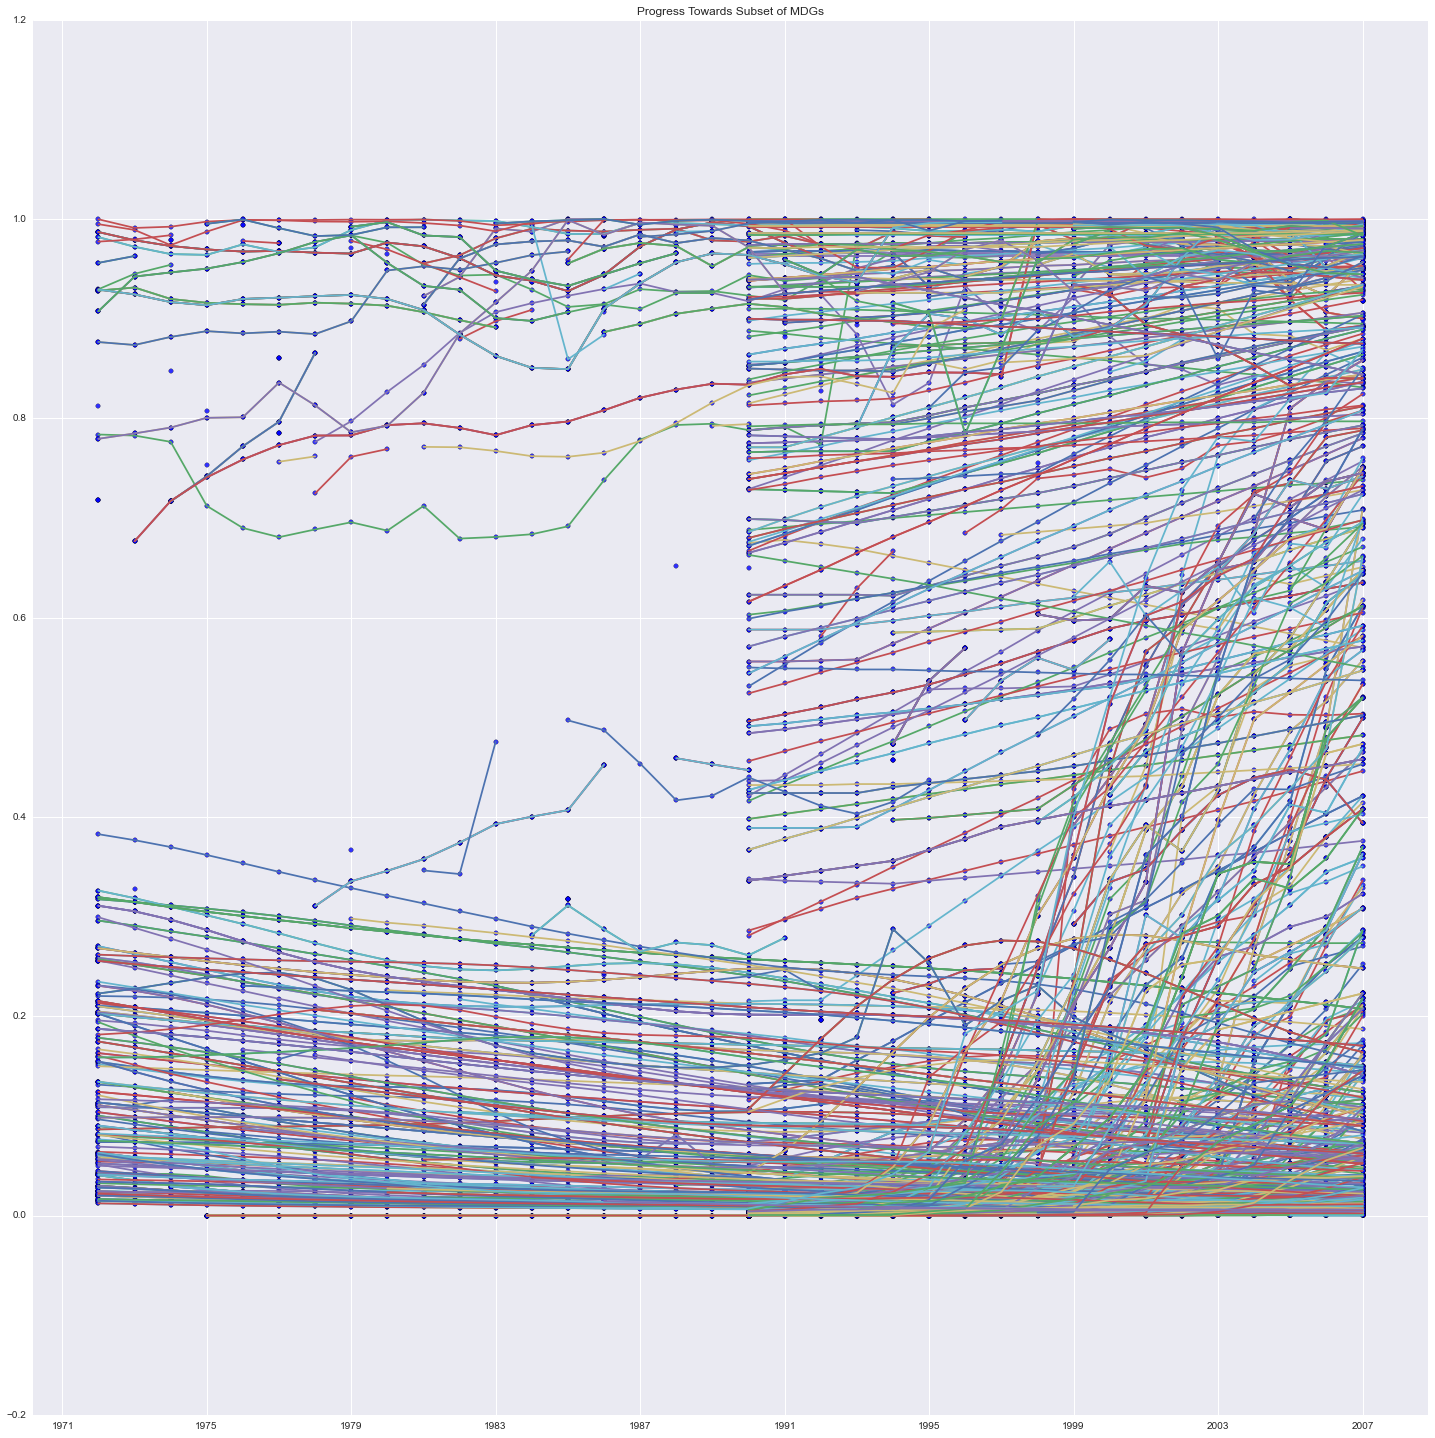

In [13]:
# grab a random sample of 10 of the timeseries
np.random.seed(100)
rand_rows = np.random.choice(prediction_rows.index.values, size=1000)

def plot_rows(data, ids=None, linestyle="-", legend=True):
    # get some colors for the lines
    bmap = pplt.brewer2mpl.get_map('Set3','Qualitative', 10, True)
    #colors = bmap.mpl_colors
    
    if not None == ids:
        get_rows = lambda: enumerate(ids)
    else:
        get_rows = lambda: enumerate(data.index.values)
    
    for i, r in get_rows():
        # get the time series values
        time_data = data.loc[r]

        # create an x axis to plot along
        just_years = [y[:4] for y in data.columns]
        X = pd.DatetimeIndex(just_years)

        # get time series info for labeling
        country, descrip = training_data[["Country Name", "Series Name"]].loc[r]

        # plot the series
        plt.plot(X, time_data, 
                 label="{} - {}".format(country, descrip), ls=linestyle)
        plt.scatter(X, time_data, alpha=0.8)

#     if legend:
#         plt.legend(loc=0)
    plt.title("Progress Towards Subset of MDGs")

plot_rows(prediction_rows, ids=rand_rows)
plt.show()

In [14]:
country_data = training_data[training_data["Country Name"] == 'India']
country_values = country_data[generate_year_list(1972, 2007)].values

In [15]:
# country_data

In [16]:
# country_values

In [17]:
#country_data.info()

In [18]:
countrydata = training_data.groupby("Country Name")

In [19]:
#data for country India containing Null Values
india = countrydata.get_group("India")
india

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
114990            NaN            NaN            NaN            NaN   
114991            NaN            NaN            NaN            NaN   
114992            NaN            NaN            NaN            NaN   
114993            NaN            NaN            NaN            NaN   
114994            NaN            NaN            NaN            NaN   
114995            NaN            NaN            NaN            NaN   
114996            NaN            NaN            NaN            NaN   
114998            NaN            NaN            NaN            NaN   
114999            NaN            NaN            NaN            NaN   
115000            NaN            NaN            NaN            NaN   
115001  -6.697895e-01   2.313600e+00  -1.531138e+00   6.592208e+00   
115002   1.396280e+11   1.428590e+11   1.406710e+11   1.499450e+11   
115003   6.563329e+10   7.828323e+10   9.029951e+10   8.772904e+10   
115004  -2.892019e+00   7.264818e-03  -3.767668e+00   4.154560e+00   
115005   2.404070e+02   2.404245e+02   2.313661e+02   2.409783e+02   
115006   1.130052e+02   1.317471e+02   1.485183e+02   1.409908e+02   
115007            NaN            NaN            NaN   7.396319e+00   
115008            NaN            NaN            NaN   7.389280e+09   
115009            NaN            NaN            NaN            NaN   
115010            NaN            NaN            NaN            NaN   
115011   4.436005e-01   4.074197e-01   3.990409e-01   4.852030e-01   
115012   3.208382e+08   3.528321e+08   4.026587e+08   4.847412e+08   
115013   7.216497e+00   6.914325e+00   7.479669e+00   8.051765e+00   
115014   5.219399e+09   5.987917e+09   7.547481e+09   8.044102e+09   
115015   2.410000e+00   2.418340e+00   2.561091e+00   2.209960e+00   
115016   1.743055e+09   2.094322e+09   2.584310e+09   2.207857e+09   
115017   2.103407e-01   2.453361e-01   6.697881e-01   1.119286e+00   
115018   1.521309e+08   2.124651e+08   6.758606e+08   1.118221e+09   
115019            NaN            NaN            NaN   1.785896e+01   
115020   1.366612e-01   1.174164e-01   1.478037e-01   2.041325e-01   
...               ...            ...            ...            ...   
116278            NaN            NaN            NaN            NaN   
116279            NaN            NaN            NaN            NaN   
116280            NaN            NaN            NaN            NaN   
116281            NaN            NaN            NaN            NaN   
116282            NaN            NaN            NaN            NaN   
116283            NaN            NaN            NaN            NaN   
116284            NaN            NaN            NaN            NaN   
116285            NaN            NaN            NaN            NaN   
116286            NaN            NaN            NaN            NaN   
116287   1.184179e+08   1.230170e+08   1.277875e+08   1.327346e+08   
116288   2.038880e+01   2.070320e+01   2.101760e+01   2.133200e+01   
116289   3.816655e+00   3.810233e+00   3.804689e+00   3.798258e+00   
116290   0.000000e+00   7.479700e+07   6.085150e+08   8.175230e+08   
116292            NaN            NaN            NaN            NaN   
116294            NaN            NaN            NaN            NaN   
116295            NaN            NaN            NaN            NaN   
116296            NaN            NaN            NaN            NaN   
116297            NaN            NaN            NaN            NaN   
116298            NaN            NaN            NaN            NaN   
116299            NaN            NaN            NaN            NaN   
116300            NaN            NaN            NaN            NaN   
116301            NaN            NaN            NaN            NaN   
116310            NaN            NaN            NaN            NaN   
116311   6.458208e+00   7.518547e+00   9.666839e+00   1.004536e+01   
116313            NaN            NaN            NaN            NaN   
116314            

In [20]:
india_values = india[generate_year_list(1972, 2007)].values
india_values

array([[         nan,          nan,          nan, ...,  10.72211477,
                 nan,          nan],
       [         nan,          nan,          nan, ...,  39.98927274,
                 nan,          nan],
       [         nan,          nan,          nan, ...,  28.40343153,
                 nan,          nan],
       ..., 
       [         nan,          nan,          nan, ...,          nan,
         34.7       ,          nan],
       [         nan,          nan,          nan, ...,          nan,
         14.1       ,          nan],
       [         nan,          nan,          nan, ...,  36.8       ,
         37.2       ,  37.5       ]])

In [21]:
india2 = countrydata.get_group("India")

In [22]:
india2[india2.columns[:36]] = india2[india2.columns[:36]].fillna(method = 'bfill', axis = 1)
#india2

P:\Anaconda Python\Anaconda\lib\site-packages\pandas\core\frame.py:2148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [23]:
india2[india2.columns[:36]] = india2[india2.columns[:36]].fillna(method = 'ffill', axis = 1)
india2

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
114990   1.072211e+01   1.072211e+01   1.072211e+01   1.072211e+01   
114991   3.998927e+01   3.998927e+01   3.998927e+01   3.998927e+01   
114992   2.840343e+01   2.840343e+01   2.840343e+01   2.840343e+01   
114993   3.995493e+00   3.995493e+00   3.995493e+00   3.995493e+00   
114994   1.466854e+01   1.466854e+01   1.466854e+01   1.466854e+01   
114995   1.560154e+01   1.560154e+01   1.560154e+01   1.560154e+01   
114996   6.860000e+01   6.860000e+01   6.860000e+01   6.860000e+01   
114998   7.824938e-01   7.824938e-01   7.824938e-01   7.824938e-01   
114999   6.611141e+01   6.611141e+01   6.611141e+01   6.611141e+01   
115000   8.952264e+01   8.952264e+01   8.952264e+01   8.952264e+01   
115001  -6.697895e-01   2.313600e+00  -1.531138e+00   6.592208e+00   
115002   1.396280e+11   1.428590e+11   1.406710e+11   1.499450e+11   
115003   6.563329e+10   7.828323e+10   9.029951e+10   8.772904e+10   
115004  -2.892019e+00   7.264818e-03  -3.767668e+00   4.154560e+00   
115005   2.404070e+02   2.404245e+02   2.313661e+02   2.409783e+02   
115006   1.130052e+02   1.317471e+02   1.485183e+02   1.409908e+02   
115007   7.396319e+00   7.396319e+00   7.396319e+00   7.396319e+00   
115008   7.389280e+09   7.389280e+09   7.389280e+09   7.389280e+09   
115009   1.046534e+01   1.046534e+01   1.046534e+01   1.046534e+01   
115010   3.374069e+10   3.374069e+10   3.374069e+10   3.374069e+10   
115011   4.436005e-01   4.074197e-01   3.990409e-01   4.852030e-01   
115012   3.208382e+08   3.528321e+08   4.026587e+08   4.847412e+08   
115013   7.216497e+00   6.914325e+00   7.479669e+00   8.051765e+00   
115014   5.219399e+09   5.987917e+09   7.547481e+09   8.044102e+09   
115015   2.410000e+00   2.418340e+00   2.561091e+00   2.209960e+00   
115016   1.743055e+09   2.094322e+09   2.584310e+09   2.207857e+09   
115017   2.103407e-01   2.453361e-01   6.697881e-01   1.119286e+00   
115018   1.521309e+08   2.124651e+08   6.758606e+08   1.118221e+09   
115019   1.785896e+01   1.785896e+01   1.785896e+01   1.785896e+01   
115020   1.366612e-01   1.174164e-01   1.478037e-01   2.041325e-01   
...               ...            ...            ...            ...   
116278   4.100000e+00   4.100000e+00   4.100000e+00   4.100000e+00   
116279   3.700000e+00   3.700000e+00   3.700000e+00   3.700000e+00   
116280   8.900000e+00   8.900000e+00   8.900000e+00   8.900000e+00   
116281   8.000000e+00   8.000000e+00   8.000000e+00   8.000000e+00   
116282   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116283   8.300000e+00   8.300000e+00   8.300000e+00   8.300000e+00   
116284   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116285   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116286   1.650000e+01   1.650000e+01   1.650000e+01   1.650000e+01   
116287   1.184179e+08   1.230170e+08   1.277875e+08   1.327346e+08   
116288   2.038880e+01   2.070320e+01   2.101760e+01   2.133200e+01   
116289   3.816655e+00   3.810233e+00   3.804689e+00   3.798258e+00   
116290   0.000000e+00   7.479700e+07   6.085150e+08   8.175230e+08   
116292   8.140000e+00   8.140000e+00   8.140000e+00   8.140000e+00   
116294   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116295   9.110000e+01   9.110000e+01   9.110000e+01   9.110000e+01   
116296   7.980000e+01   7.980000e+01   7.980000e+01   7.980000e+01   
116297   8.310000e+01   8.310000e+01   8.310000e+01   8.310000e+01   
116298   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116299   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116300   1.780000e+01   1.780000e+01   1.780000e+01   1.780000e+01   
116301   2.600000e+00   2.600000e+00   2.600000e+00   2.600000e+00   
116310   5.020092e-01   5.020092e-01   5.020092e-01   5.020092e-01   
116311   6.458208e+00   7.518547e+00   9.666839e+00   1.004536e+01   
116313   3.030000e+01   3.030000e+01   3.030000e+01   3.030000e+01   
116314   2.040000e

In [24]:
#india2.info()

In [25]:
indiarows = india2.loc[india2.index]
#indiarows

In [26]:
#indiarows.loc[115541]

In [27]:
indiarows.index.values

array([114990, 114991, 114992, ..., 116316, 116317, 116318], dtype=int64)

In [28]:
indiarows = indiarows[generate_year_list(1972, 2007)]

P:\Anaconda Python\Anaconda\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


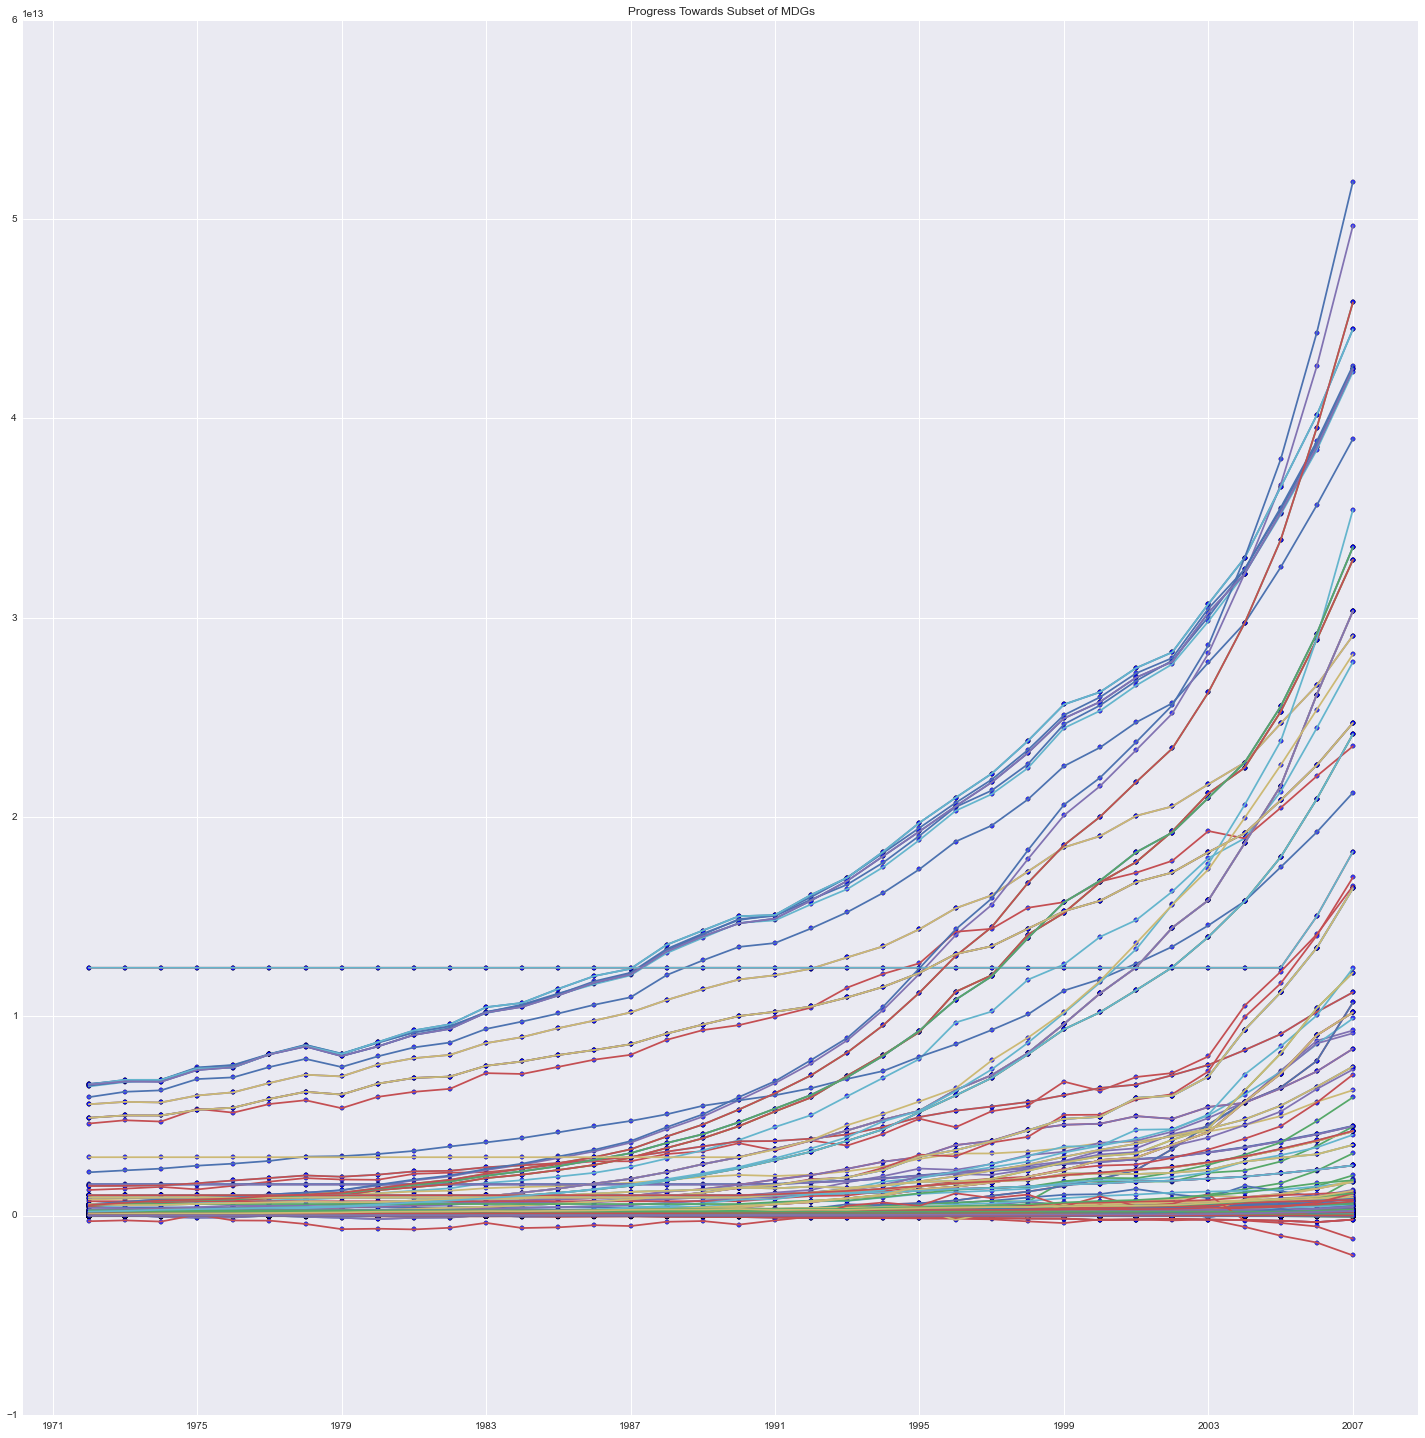

In [29]:
np.random.seed(100)
rand_rows = np.random.choice(indiarows.index.values, size=1240)

def plot_rows(data, ids=None, linestyle="-", legend=True):
    # get some colors for the lines
    bmap = pplt.brewer2mpl.get_map('Set3','Qualitative', 10, True)
    #colors = bmap.mpl_colors
    
    if not None == ids:
        get_rows = lambda: enumerate(ids)
    else:
        get_rows = lambda: enumerate(data.index.values)
    
    for i, r in get_rows():
        # get the time series values
        time_data = data.loc[r]

        # create an x axis to plot along
        just_years = [y[:4] for y in data.columns]
        X = pd.DatetimeIndex(just_years)

        # get time series info for labeling
        country, descrip = india2[["Country Name", "Series Name"]].loc[r]

        # plot the series
        plt.plot(X, time_data, 
                 label="{} - {}".format(country, descrip), ls=linestyle)
        plt.scatter(X, time_data, alpha=0.8)

#     if legend:
#         plt.legend(loc=0)
    plt.title("Progress Towards Subset of MDGs")

plot_rows(indiarows, ids=rand_rows)
plt.show()

In [30]:
india_pred_rows = india2.loc[submission_labels.index]

In [31]:
india_pred_rows = india_pred_rows[india_pred_rows["Country Name"] == "India"]
india_pred_rows

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
115541          0.703         0.7030          0.703         0.7030   
115600          0.000         0.0000          0.000         0.0000   
115735          0.204         0.2002          0.196         0.1915   
116012          0.001         0.0010          0.001         0.0010   

        1976 [YR1976]  1977 [YR1977]  1978 [YR1978]  1979 [YR1979]  \
115541         0.7030         0.7030         0.7030         0.7030   
115600         0.0000         0.0000         0.0000         0.0000   
115735         0.1867         0.1817         0.1764         0.1713   
116012         0.0010         0.0010         0.0010         0.0010   

        1980 [YR1980]  1981 [YR1981]  1982 [YR1982]  1983 [YR1983]  \
115541         0.7030         0.7030         0.7030         0.7030   
115600         0.0000         0.0000         0.0000         0.0000   
115735         0.1663         0.1614         0.1569         0.1526   
116012         0.0010         0.0010         0.0010         0.0010   

        1984 [YR1984]  1985 [YR1985]  1986 [YR1986]  1987 [YR1987]  \
115541         0.7030         0.7030         0.7030         0.7030   
115600         0.0000         0.0000         0.0000         0.0000   
115735         0.1485         0.1445         0.1406         0.1367   
116012         0.0010         0.0010         0.0010         0.0010   

        1988 [YR1988]  1989 [YR1989]  1990 [YR1990]  1991 [YR1991]  \
115541         0.7030         0.7030         0.7030       0.714000   
115600         0.0000         0.0000         0.0000       0.000001   
115735         0.1329         0.1292         0.1256       0.122100   
116012         0.0010         0.0010         0.0010       0.001000   

        1992 [YR1992]  1993 [YR1993]  1994 [YR1994]  1995 [YR1995]  \
115541       0.724000       0.734000       0.745000       0.755000   
115600       0.000001       0.000002       0.000011       0.000262   
115735       0.118700       0.115400       0.112100       0.108800   
116012       0.001000       0.001000       0.001000       0.002000   

        1996 [YR1996]  1997 [YR1997]  1998 [YR1998]  1999 [YR1999]  \
115541       0.765000       0.776000        0.78600       0.796000   
115600       0.000463       0.000708        0.00139       0.002732   
115735       0.105500       0.102000        0.09850       0.095000   
116012       0.002000       0.003000        0.00300       0.004000   

        2000 [YR2000]  2001 [YR2001]  2002 [YR2002]  2003 [YR2003]  \
115541       0.806000       0.816000       0.827000       0.837000   
115600       0.005275       0.006601       0.015379       0.016865   
115735       0.091500       0.088100       0.084700       0.081300   
116012       0.004000       0.004000       0.004000       0.004000   

        2004 [YR2004]  2005 [YR2005]  2006 [YR2006]  2007 [YR2007]  \
115541       0.847000       0.857000       0.867000         0.8770   
115600       0.019761       0.023881       0.028055         0.0395   
115735       0.078200       0.075100       0.072100         0.0693   
116012       0.004000       0.004000       0.004000         0.0030   

       Country Name Series Code  \
115541        India         7.8   
115600        India        8.16   
115735        India         4.1   
116012        India         6.1   

                                              Series Name  
115541                Ensure environmental sustainability  
115600  Develop a global partnership for development: ...  
115735                             Reduce child mortality  
116012                                    Combat HIV/AIDS

In [32]:
india_train = india2[~india2.index.isin(india_pred_rows.index.values)]
india_train

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
114990   1.072211e+01   1.072211e+01   1.072211e+01   1.072211e+01   
114991   3.998927e+01   3.998927e+01   3.998927e+01   3.998927e+01   
114992   2.840343e+01   2.840343e+01   2.840343e+01   2.840343e+01   
114993   3.995493e+00   3.995493e+00   3.995493e+00   3.995493e+00   
114994   1.466854e+01   1.466854e+01   1.466854e+01   1.466854e+01   
114995   1.560154e+01   1.560154e+01   1.560154e+01   1.560154e+01   
114996   6.860000e+01   6.860000e+01   6.860000e+01   6.860000e+01   
114998   7.824938e-01   7.824938e-01   7.824938e-01   7.824938e-01   
114999   6.611141e+01   6.611141e+01   6.611141e+01   6.611141e+01   
115000   8.952264e+01   8.952264e+01   8.952264e+01   8.952264e+01   
115001  -6.697895e-01   2.313600e+00  -1.531138e+00   6.592208e+00   
115002   1.396280e+11   1.428590e+11   1.406710e+11   1.499450e+11   
115003   6.563329e+10   7.828323e+10   9.029951e+10   8.772904e+10   
115004  -2.892019e+00   7.264818e-03  -3.767668e+00   4.154560e+00   
115005   2.404070e+02   2.404245e+02   2.313661e+02   2.409783e+02   
115006   1.130052e+02   1.317471e+02   1.485183e+02   1.409908e+02   
115007   7.396319e+00   7.396319e+00   7.396319e+00   7.396319e+00   
115008   7.389280e+09   7.389280e+09   7.389280e+09   7.389280e+09   
115009   1.046534e+01   1.046534e+01   1.046534e+01   1.046534e+01   
115010   3.374069e+10   3.374069e+10   3.374069e+10   3.374069e+10   
115011   4.436005e-01   4.074197e-01   3.990409e-01   4.852030e-01   
115012   3.208382e+08   3.528321e+08   4.026587e+08   4.847412e+08   
115013   7.216497e+00   6.914325e+00   7.479669e+00   8.051765e+00   
115014   5.219399e+09   5.987917e+09   7.547481e+09   8.044102e+09   
115015   2.410000e+00   2.418340e+00   2.561091e+00   2.209960e+00   
115016   1.743055e+09   2.094322e+09   2.584310e+09   2.207857e+09   
115017   2.103407e-01   2.453361e-01   6.697881e-01   1.119286e+00   
115018   1.521309e+08   2.124651e+08   6.758606e+08   1.118221e+09   
115019   1.785896e+01   1.785896e+01   1.785896e+01   1.785896e+01   
115020   1.366612e-01   1.174164e-01   1.478037e-01   2.041325e-01   
...               ...            ...            ...            ...   
116278   4.100000e+00   4.100000e+00   4.100000e+00   4.100000e+00   
116279   3.700000e+00   3.700000e+00   3.700000e+00   3.700000e+00   
116280   8.900000e+00   8.900000e+00   8.900000e+00   8.900000e+00   
116281   8.000000e+00   8.000000e+00   8.000000e+00   8.000000e+00   
116282   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116283   8.300000e+00   8.300000e+00   8.300000e+00   8.300000e+00   
116284   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116285   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116286   1.650000e+01   1.650000e+01   1.650000e+01   1.650000e+01   
116287   1.184179e+08   1.230170e+08   1.277875e+08   1.327346e+08   
116288   2.038880e+01   2.070320e+01   2.101760e+01   2.133200e+01   
116289   3.816655e+00   3.810233e+00   3.804689e+00   3.798258e+00   
116290   0.000000e+00   7.479700e+07   6.085150e+08   8.175230e+08   
116292   8.140000e+00   8.140000e+00   8.140000e+00   8.140000e+00   
116294   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116295   9.110000e+01   9.110000e+01   9.110000e+01   9.110000e+01   
116296   7.980000e+01   7.980000e+01   7.980000e+01   7.980000e+01   
116297   8.310000e+01   8.310000e+01   8.310000e+01   8.310000e+01   
116298   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116299   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116300   1.780000e+01   1.780000e+01   1.780000e+01   1.780000e+01   
116301   2.600000e+00   2.600000e+00   2.600000e+00   2.600000e+00   
116310   5.020092e-01   5.020092e-01   5.020092e-01   5.020092e-01   
116311   6.458208e+00   7.518547e+00   9.666839e+00   1.004536e+01   
116313   3.030000e+01   3.030000e+01   3.030000e+01   3.030000e+01   
116314   2.040000e

In [33]:
from sklearn.preprocessing import StandardScaler
#normalized_data = StandardScaler().fit_transform(data.astype(float))

In [34]:
# pred_period = 10

# def predict(x,span,periods = pred_period):     
#     x_predict = np.zeros((span+periods))
#     x_predict[:span] = x[-span:]
#     pred =  ewma(x_predict,span)[span:]

#     return pred

In [35]:
# abc = [1,2,3,4,5,6,7,8,9,10]
# bcd = [1,1,1,1,1,1,1,1,1,1]

In [36]:
# predict(abc,2)

In [37]:
# pred_period = 10

# def predict(x,span,periods = pred_period):     
#     x_predict = np.zeros((span+periods))
#     x_predict[:span] = x[-span:]
#     pred =  ewmcorr(x_predict,span)[span:]

#     return pred

In [38]:
i1 = india_train.loc[115001]
iy1 = i1[generate_year_list(1972, 2007)].values
iy1

array([-0.66978948700000007, 2.3136004519999998, -1.5311382409999998,
       6.5922084749999996, 1.8161996280000001, 8.833188036000001,
       5.3757019770000003, -8.1731379889999989, 6.5615270350000001,
       6.4224539389999995, 2.2983261609999999, 10.698687680000001,
       2.2348755680000001, 5.4530188679999991, 6.6478434499999999,
       3.486370102, 9.03933477, 5.4726988829999996, 4.6300196549999999,
       0.78361576499999996, 6.5674782999999994, 7.227350865,
       8.1108886089999999, 6.4325634550000004, 4.651519103,
       8.6699756600000004, 7.5691930229999995, 7.966891124,
       2.3840047900000001, 4.3998341830000003, 3.4647733239999998,
       8.1736921450000004, 5.9810285600000004, 9.4458573500000007,
       8.8023251919999996, 10.0513843], dtype=object)

In [39]:
i1.count()

39

In [40]:
# #prediction one india indicator with a simple EWMA model
# pred_period = 36

# def predict(x,span,periods = pred_period):     
#     x_predict = np.zeros((span+periods))
#     x_predict[:span] = x[-span:]
#     pred =  ewma(x_predict,span)[span:]

#     return pred

In [41]:
# predict(iy1,1,40)

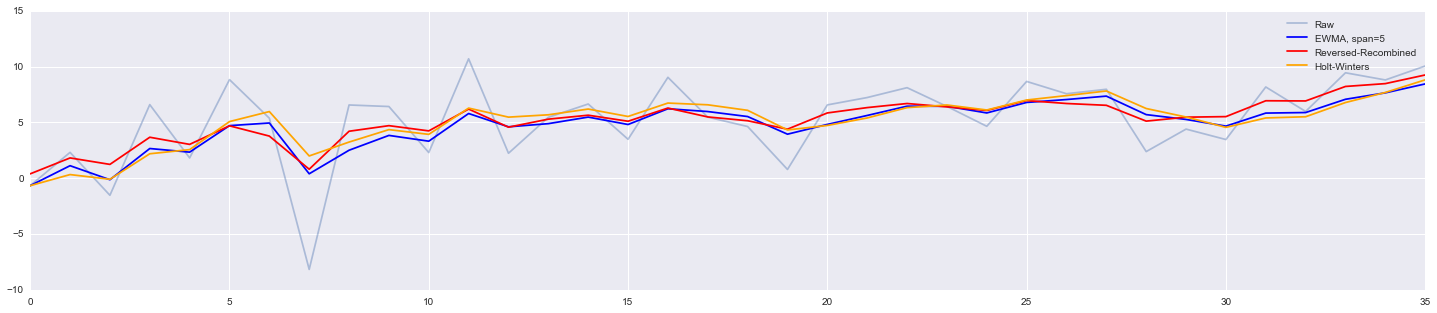

In [42]:
plt.rcParams['figure.figsize'] = (25.0, 5.0)
x = iy1
plot(x, alpha=0.4, label='Raw' )

# take EWMA in both directions with a smaller span term
fwd = ewma( x, span=5 )          # take EWMA in fwd direction
bwd = ewma( x[::-1], span=5 )    # take EWMA in bwd direction
c = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
c = np.mean( c, axis=0 )          # average  

# regular EWMA, with bias against trend
plot( ewma( x, span=5 ), 'b', label='EWMA, span=5' )

# "corrected" (?) EWMA
plot( c, 'r', label='Reversed-Recombined' )

#savefig( 'ewma_correction.png', fmt='png', dpi=100 )

def holt_winters_second_order_ewma(x, span, beta):
    N = x.size
    alpha = 2.0 / ( 1 + span )
    s = np.zeros(( N, ))
    b = np.zeros(( N, ))
    s[0] = x[0]
    for i in range( 1, N ):
        s[i] = alpha * x[i] + ( 1 - alpha )*( s[i-1] + b[i-1] )
        b[i] = beta * ( s[i] - s[i-1] ) + ( 1 - beta ) * b[i-1]
    return s
 
# make a hat function, and add noise
# x = np.linspace(0,1,100)
# x = np.hstack((x,x[::-1]))
# x += np.random.normal( loc=0, scale=0.1, size=200 ) + 3.0
#plot( iy1, alpha=0.4, label='Raw' )
 
# holt winters second order ewma
plot( holt_winters_second_order_ewma(iy1, 5, 0.3), 'orange', label='Holt-Winters' )
 
#title('Holt-Winters' )
legend( loc=1 )
 
#savefig( 'holt_winters.png', fmt='png', dpi=100 )

In [43]:
plt.rcParams['figure.figsize'] = (25.0, 10.0)
x = iy1
plot(x, alpha=0.4, label='Raw' )

# take EWMA in both directions with a smaller span term
fwd = ewma( x, span=5 )          # take EWMA in fwd direction
bwd = ewma( x[::-1], span=5 )    # take EWMA in bwd direction
c = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
c = np.mean( c, axis=0 )          # average  

# regular EWMA, with bias against trend
plot( ewma( x, span=10 ), 'b', label='EWMA, span=10' )
plot( ewma( x, span=5 ), 'orange', label='EWMA, span=5' )
plot( ewma( x, span=3 ), 'green', label='EWMA, span=3' )
plot( ewma( x, span=2 ), 'yellow', label='EWMA, span=2' )
#plot( c, 'black', label='Reversed-Recombined2' )
legend( loc=1 )

# "corrected" (?) EWMA
plot( c, 'r', label='Reversed-Recombined' )

In [44]:
plt.rcParams['figure.figsize'] = (30.0, 15.0)
def holt_winters_second_order_ewma(x, span, beta):
    N = x.size
    alpha = 2.0 / ( 1 + span )
    s = np.zeros(( N, ))
    b = np.zeros(( N, ))
    s[0] = x[0]
    for i in range( 1, N ):
        s[i] = alpha * x[i] + ( 1 - alpha )*( s[i-1] + b[i-1] )
        b[i] = beta * ( s[i] - s[i-1] ) + ( 1 - beta ) * b[i-1]
    return s
plot( iy1, alpha=0.4, label='Raw' )

# holt winters second order ewma
#plot( holt_winters_second_order_ewma(iy1, 5, 1), 'b', label='Holt-Winters - 10' )
#plot( holt_winters_second_order_ewma(iy1, 5, 0.25), 'red', label='Holt-Winters - 5' )
plot( holt_winters_second_order_ewma(iy1, 3, 0.5), 'orange', label='Holt-Winters - 3' )
plot( holt_winters_second_order_ewma(iy1, 3, 0.25), 'black', label='Holt-Winters - 2' )
plot( holt_winters_second_order_ewma(iy1, 3, .75), 'green', label='Holt-Winters - 36' )
title('Holt-Winters' )
legend( loc=0)
#savefig( 'holt_winters.png', fmt='png', dpi=100 )

In [ ]:
def holt_winters_second_order_ewma(x, span, beta):
    N = x.size
    alpha = 2.0 / ( 1 + span )
    s = np.zeros(( N, ))
    b = np.zeros(( N, ))
    s[0] = x[0]
    for i in range( 1, N ):
        s[i] = alpha * x[i] + ( 1 - alpha )*( s[i-1] + b[i-1] )
        b[i] = beta * ( s[i] - s[i-1] ) + ( 1 - beta ) * b[i-1]
    return s
# plot( iy1, alpha=0.4, label='Raw' )
# plot( holt_winters_second_order_ewma(iy1, 3, .25), 'b', label='Holt-Winters - 10' )

In [ ]:
pred_period = 10

def predict(x,span,beta):     
    x_predict = np.zeros((span+periods))
    x_predict[:span] = x[-span:]
    pred =  ewma(x_predict,span)[span:]
    

    return pred

In [66]:
holt_winters_second_order_ewma

<function __main__.holt_winters_second_order_ewma>

In [ ]:
# #prediction one india indicator with a simple EWMA model
# pred_period = 36

# def predict(x,span,periods = pred_period):     
#     x_predict = np.zeros((span+periods))
#     x_predict[:span] = x[-span:]
#     pred =  ewma(x_predict,span)[span:]

#     return pred

In [45]:
q=holt_winters_second_order_ewma(iy1, 3, 0.25)

In [46]:
#iy1.shape = (7,5)
p=iy1

In [47]:
e=p-q
e

array([0.0, 1.4916949694999999, -1.3629837329374999, 3.3640925869609375,
       -1.1425586079599603, 2.6434342480745858, -1.0312358384174649,
       -7.7853433553613067, 3.9525233005869351, 1.8905221559876892,
       -1.3693210268103946, 3.4341671586418627, -3.0254464589622416,
       -0.036094754394014217, 0.45143358318935256, -1.5393804109176341,
       2.0148541513935765, -1.0196856138750148, -1.0475164652749331,
       -2.4323546638155258, 1.9944037823911183, 1.3964875476955516,
       1.0348010763858237, -0.55632374281726804, -1.3337052835666556,
       1.3440675610044828, -0.044674058835508568, 0.015779757598934907,
       -2.9462580213837106, -0.25963679470206902, -0.35931670802349069,
       2.4577477638187357, 0.10827032626250599, 1.7487440042015781,
       0.29620736864591635, 0.47920876278734603], dtype=object)

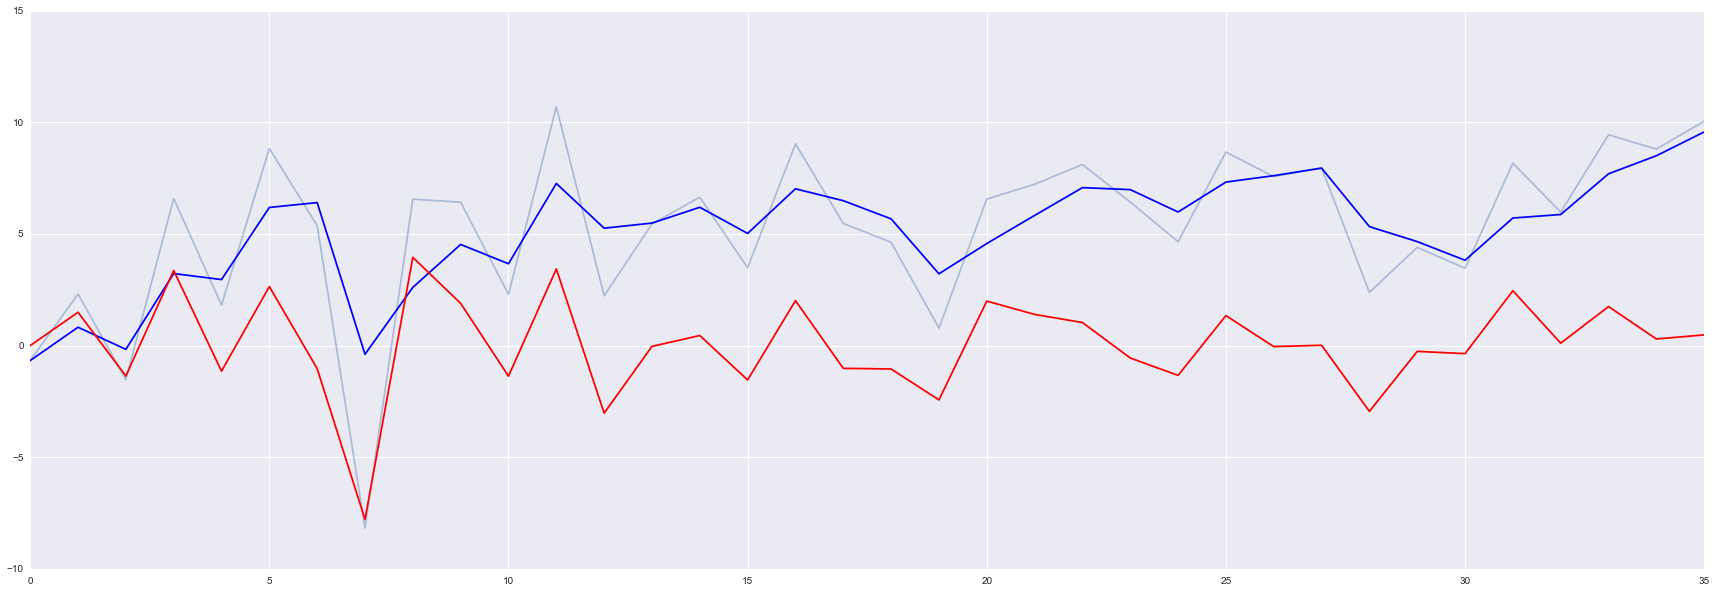

In [48]:
plt.rcParams['figure.figsize'] = (30.0, 10.0)
plot( iy1, alpha=0.4, label='Raw' )
plot(q,'blue')
plot(e,'red')

In [49]:
#Normalizing the same index and predicting using Holt-Winter
from sklearn.preprocessing import StandardScaler
iy1n = StandardScaler().fit_transform(iy1.astype(float))
iy1n

array([-1.58043923, -0.78088688, -1.8112818 ,  0.36578558, -0.91419094,
        0.96637099,  0.03976027, -3.59134629,  0.35756292,  0.32029115,
       -0.78498041,  1.4663273 , -0.80198525,  0.0604813 ,  0.38069583,
       -0.4665831 ,  1.02161858,  0.06575557, -0.16008355, -1.19092475,
        0.35915786,  0.53600456,  0.77279381,  0.32300051, -0.15432167,
        0.92262986,  0.6276187 ,  0.7342023 , -0.76201843, -0.22177355,
       -0.47237107,  0.78962524,  0.20198858,  1.13056716,  0.95809971,
        1.29284916])

In [50]:
qn=holt_winters_second_order_ewma(iy1n, 3, 0.25)
pn=iy1n
en=pn-qn

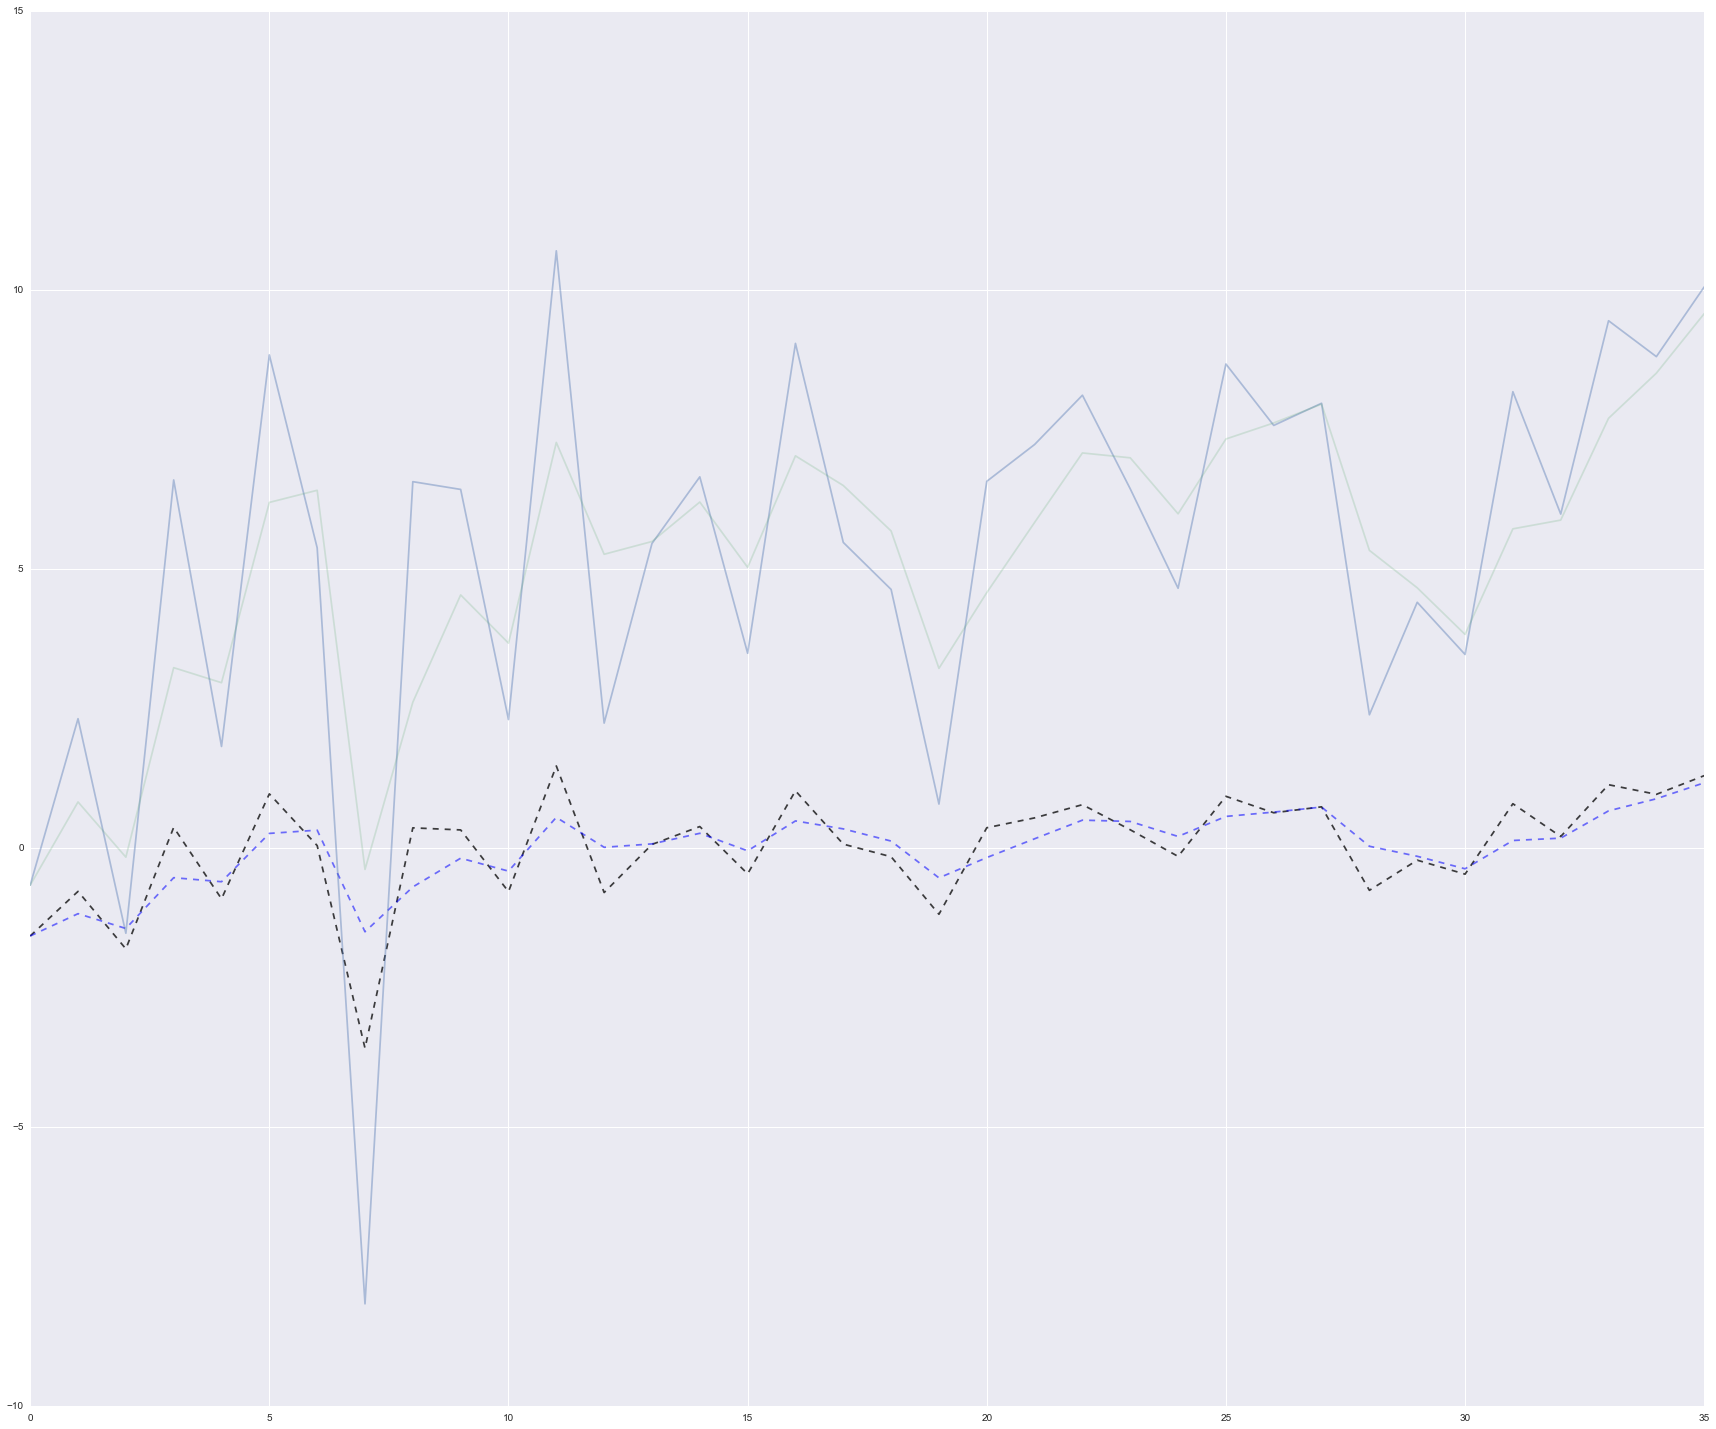

In [51]:
plt.rcParams['figure.figsize'] = (30.0, 25.0)
plot(iy1n, 'black',alpha=.75,linestyle='dashed')
plot(qn,'blue', alpha=.55,linestyle='dashed')
#plot(en,'red', alpha=.25,linestyle='dashed')

plot(iy1, alpha=0.4, label='Raw')
plot(q, alpha=0.2, label='Raw')
#plot(e,'red', alpha=0.12,label='Raw')


In [52]:
ind=india_train
ind

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
114990   1.072211e+01   1.072211e+01   1.072211e+01   1.072211e+01   
114991   3.998927e+01   3.998927e+01   3.998927e+01   3.998927e+01   
114992   2.840343e+01   2.840343e+01   2.840343e+01   2.840343e+01   
114993   3.995493e+00   3.995493e+00   3.995493e+00   3.995493e+00   
114994   1.466854e+01   1.466854e+01   1.466854e+01   1.466854e+01   
114995   1.560154e+01   1.560154e+01   1.560154e+01   1.560154e+01   
114996   6.860000e+01   6.860000e+01   6.860000e+01   6.860000e+01   
114998   7.824938e-01   7.824938e-01   7.824938e-01   7.824938e-01   
114999   6.611141e+01   6.611141e+01   6.611141e+01   6.611141e+01   
115000   8.952264e+01   8.952264e+01   8.952264e+01   8.952264e+01   
115001  -6.697895e-01   2.313600e+00  -1.531138e+00   6.592208e+00   
115002   1.396280e+11   1.428590e+11   1.406710e+11   1.499450e+11   
115003   6.563329e+10   7.828323e+10   9.029951e+10   8.772904e+10   
115004  -2.892019e+00   7.264818e-03  -3.767668e+00   4.154560e+00   
115005   2.404070e+02   2.404245e+02   2.313661e+02   2.409783e+02   
115006   1.130052e+02   1.317471e+02   1.485183e+02   1.409908e+02   
115007   7.396319e+00   7.396319e+00   7.396319e+00   7.396319e+00   
115008   7.389280e+09   7.389280e+09   7.389280e+09   7.389280e+09   
115009   1.046534e+01   1.046534e+01   1.046534e+01   1.046534e+01   
115010   3.374069e+10   3.374069e+10   3.374069e+10   3.374069e+10   
115011   4.436005e-01   4.074197e-01   3.990409e-01   4.852030e-01   
115012   3.208382e+08   3.528321e+08   4.026587e+08   4.847412e+08   
115013   7.216497e+00   6.914325e+00   7.479669e+00   8.051765e+00   
115014   5.219399e+09   5.987917e+09   7.547481e+09   8.044102e+09   
115015   2.410000e+00   2.418340e+00   2.561091e+00   2.209960e+00   
115016   1.743055e+09   2.094322e+09   2.584310e+09   2.207857e+09   
115017   2.103407e-01   2.453361e-01   6.697881e-01   1.119286e+00   
115018   1.521309e+08   2.124651e+08   6.758606e+08   1.118221e+09   
115019   1.785896e+01   1.785896e+01   1.785896e+01   1.785896e+01   
115020   1.366612e-01   1.174164e-01   1.478037e-01   2.041325e-01   
...               ...            ...            ...            ...   
116278   4.100000e+00   4.100000e+00   4.100000e+00   4.100000e+00   
116279   3.700000e+00   3.700000e+00   3.700000e+00   3.700000e+00   
116280   8.900000e+00   8.900000e+00   8.900000e+00   8.900000e+00   
116281   8.000000e+00   8.000000e+00   8.000000e+00   8.000000e+00   
116282   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116283   8.300000e+00   8.300000e+00   8.300000e+00   8.300000e+00   
116284   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116285   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116286   1.650000e+01   1.650000e+01   1.650000e+01   1.650000e+01   
116287   1.184179e+08   1.230170e+08   1.277875e+08   1.327346e+08   
116288   2.038880e+01   2.070320e+01   2.101760e+01   2.133200e+01   
116289   3.816655e+00   3.810233e+00   3.804689e+00   3.798258e+00   
116290   0.000000e+00   7.479700e+07   6.085150e+08   8.175230e+08   
116292   8.140000e+00   8.140000e+00   8.140000e+00   8.140000e+00   
116294   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116295   9.110000e+01   9.110000e+01   9.110000e+01   9.110000e+01   
116296   7.980000e+01   7.980000e+01   7.980000e+01   7.980000e+01   
116297   8.310000e+01   8.310000e+01   8.310000e+01   8.310000e+01   
116298   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116299   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116300   1.780000e+01   1.780000e+01   1.780000e+01   1.780000e+01   
116301   2.600000e+00   2.600000e+00   2.600000e+00   2.600000e+00   
116310   5.020092e-01   5.020092e-01   5.020092e-01   5.020092e-01   
116311   6.458208e+00   7.518547e+00   9.666839e+00   1.004536e+01   
116313   3.030000e+01   3.030000e+01   3.030000e+01   3.030000e+01   
116314   2.040000e

In [53]:
#linear_model.LinearRegression()
X= ind[ind.columns[:35]]
y= ind[ind.columns[35]]
model=linear_model.LinearRegression().fit(X, y)
model.coef_

array([ -5.27312513,   6.16239124,  -7.99468422,  12.64751759,
        -9.94989376,  -0.3718152 ,   2.77936807,  12.82079727,
       -10.21106889,   8.19261254, -11.79062917,  -0.73772208,
         3.85187553,  -3.10476608,  -2.69533025,  13.04911316,
        -1.86113918, -11.45576753,   7.20576179,  -1.68642519,
         0.7403851 ,  -1.38793221,   2.96204109,  -3.2335876 ,
         0.69147526,  -0.23706731,   0.94674782,   1.06471668,
        -0.83187848,  -0.16524274,  -0.53162155,   0.15186123,
         0.69220161,  -1.64336832,   2.21105913])

In [54]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.35, random_state=10)

In [55]:
model.fit(X_train, y_train)
model.score(X_test, y_test)  

0.9996996211668786

In [56]:
from sklearn.cross_validation import cross_val_predict
predicted = cross_val_predict(model, X_test, y_test, cv=5)
predicted

array([  4.55847837e+08,  -3.44731780e+09,   4.55847864e+08,
         1.25136959e+12,   3.01289149e+13,   7.67766610e+11,
         6.28371696e+08,   4.55847908e+08,   1.59782980e+10,
         2.03562612e+09,   4.55847819e+08,   4.55847935e+08,
         6.04832078e+11,   4.55847939e+08,   4.55847842e+08,
         4.55847850e+08,   4.55847846e+08,   4.55847854e+08,
         7.24695057e+10,   4.55847833e+08,   1.75576029e+13,
         4.55849046e+08,   4.55847865e+08,   7.44837789e+10,
         3.04320381e+11,   4.55847853e+08,   4.61760792e+12,
         4.55847828e+08,   4.55847897e+08,   7.48787712e+10,
         4.55847832e+08,   4.55849092e+08,   4.66492113e+08,
         4.55847876e+08,   4.55847867e+08,   4.55847833e+08,
         4.55848683e+08,   4.55847907e+08,   4.55848352e+08,
         1.76806017e+09,   4.55847839e+08,   4.55847978e+08,
         2.92223473e+11,   4.55847968e+08,   4.55847843e+08,
         4.55847495e+08,   4.55847880e+08,   4.55847835e+08,
         4.55847855e+08,

In [57]:
#india_pred_rows

In [58]:
X_india_pred_rows= india_pred_rows[india_pred_rows.columns[:35]].values
y_india_pred_rows= india_pred_rows[india_pred_rows.columns[35]].values

In [59]:
model.predict(X_india_pred_rows)

array([  6.87126170e+08,   6.87126169e+08,   6.87126169e+08,
         6.87126169e+08])

In [60]:
model.score(X_india_pred_rows, y_india_pred_rows)

-3.5561633905859528e+18

In [61]:
clf2 = linear_model.BayesianRidge()
clf2.fit(X, y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [62]:
clf2.coef_

array([ -4.55524111,   5.29227886,  -6.95827246,  11.10903323,
        -8.5080342 ,  -1.35644665,   3.47358173,  11.57966138,
        -8.15694007,   7.02159769, -11.86532824,  -0.54242032,
         3.06578968,  -2.68594547,  -2.29942846,  11.64300937,
        -0.94296671, -10.640375  ,   6.47219237,  -1.51820741,
         0.70552675,  -1.38440525,   2.84098845,  -3.05562568,
         0.64600358,  -0.26608902,   0.94257429,   1.07316908,
        -0.8536488 ,  -0.14755581,  -0.57146137,   0.17770595,
         0.73708995,  -1.66622452,   2.20272172])

In [63]:
clf2.score

<bound method BayesianRidge.score of BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)>

In [64]:
clf2.predict(X_india_pred_rows)

array([  1.33232181e+09,   1.33232181e+09,   1.33232181e+09,
         1.33232181e+09])

In [65]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import Range1d

from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Statsmodel APIs
import statsmodels.api as sm